<a href="https://colab.research.google.com/github/ku-selene/COSE214-Fall2025/blob/main/COSE214_DP_Hands_On_Session_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Solving APSP - Floyd–Warshall Algorithm**

## Defining Helper functions

In [1]:
# -----------------
# 🔓 DO NOT MODIFY
# -----------------

from typing import List, Tuple, Optional # Add this!!

import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(
  n: int,
  edges: List[Tuple[int, int, float]],
):
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.circular_layout(G)  # or spring_layout, etc.

    plt.figure(figsize=(5, 4))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color="lightblue")
    nx.draw_networkx_labels(G, pos)

    # Figure out which edges have an opposite-direction pair
    edge_pairs = {(u, v) for (u, v, _) in edges}
    bidir_edges = set()
    for u, v in edge_pairs:
        if (v, u) in edge_pairs and (v, u) not in bidir_edges:
            bidir_edges.add((u, v))
            bidir_edges.add((v, u))
    sindir_edges = edge_pairs - bidir_edges

    # Draw edges
    edge_labels = {(u, v): w for (u, v, w) in edges}

    nx.draw_networkx_edges(
        G, pos, edgelist=sindir_edges,
        arrows=True, connectionstyle="arc3,rad=0.0"
    )
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels={edge: edge_labels[edge] for edge in sindir_edges},
        connectionstyle="arc3,rad=0.0"
    )

    nx.draw_networkx_edges(
        G, pos, edgelist=bidir_edges,
        arrows=True, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels={edge: edge_labels[edge] for edge in bidir_edges},
        connectionstyle="arc3,rad=0.2"
    )

    plt.axis("off")
    plt.tight_layout()
    plt.show()

def reconstruct_path(
    u: int, v: int, nxt: List[List[Optional[int]]]
) -> Optional[List[int]]:
    """
    Reconstruct a shortest path from u to v using the 'nxt' matrix.
    Returns a list of vertices [u, ..., v], or None if no path exists.
    """
    if nxt[u][v] is None:
        return None
    path = [u]
    while u != v:
        u = nxt[u][v]
        if u is None:  # safety check
            return None
        path.append(u)
    return path

def test_floyd_warshall(n, edges,
                        dist_expected, neg_expected, nxt_expected=None):
    # visualize input
    visualize_graph(n=n, edges=edges)

    dist, nxt, neg = floyd_warshall(n=n, edges=edges)

    assert dist == dist_expected, (
        "Distance matrix mismatch.\n"
        f"Expected:\n{dist_expected}\n"
        f"Got:\n{dist}"
    )

    assert neg == neg_expected, (
        f"Negative cycle flag mismatch. "
        f"Expected {neg_expected}, got {neg}"
    )

    if nxt_expected is not None:
        assert nxt == nxt_expected, (
            "Next-matrix mismatch.\n"
            f"Expected:\n{nxt_expected}\n"
            f"Got:\n{nxt}"
        )

    # print reconstructed paths if no negative cycle
    if not neg:
        for u in range(n):
            for v in range(n):
                path = reconstruct_path(u, v, nxt)
                print(f"From {u} to {v}: {path} (dist: {dist[u][v]})")

## 👉 Implement the Main Algorithm of Floyd-Warshall

**Initialization**  
- $dist^{(0)}(u,v) = w(u,v)$ if $(u,v) \in E$, else $\infty$.  
- $dist^{(0)}(u,u) = 0$.  

**Update Rule** (for $k=1 \to n$):  
$$
dist^{(k)}(u,v) = \min\Big( dist^{(k-1)}(u,v), \; dist^{(k-1)}(u,k) + dist^{(k-1)}(k,v) \Big)
$$

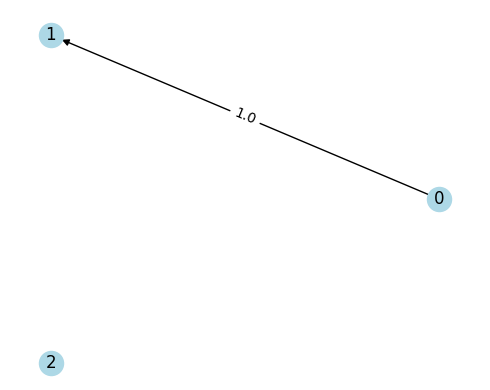

From 0 to 0: [0] (dist: 0.0)
From 0 to 1: [0, 1] (dist: 1.0)
From 0 to 2: None (dist: inf)
From 1 to 0: None (dist: inf)
From 1 to 1: [1] (dist: 0.0)
From 1 to 2: None (dist: inf)
From 2 to 0: None (dist: inf)
From 2 to 1: None (dist: inf)
From 2 to 2: [2] (dist: 0.0)


In [2]:
from math import inf
from typing import List, Tuple, Optional

def floyd_warshall(
    n: int,
    edges: List[Tuple[int, int, float]],
) -> Tuple[List[List[float]], List[List[Optional[int]]], bool]:
    """
    Floyd–Warshall algorithm for all-pairs shortest paths.

    Args:
        n: Number of vertices in the graph (vertices are labeled 0..n-1).
        edges: Iterable of directed edges, each given as a triple (u, v, w),
               where u -> v has weight w.

    Returns:
        d:   n×n matrix where d[u][v] is the shortest distance from u to v.
             If v is unreachable from u, d[u][v] is float('inf').
        nxt: n×n "next" matrix for path reconstruction.
             - If there is a path from u to v, nxt[u][v] is the next vertex
               after u on some shortest u→v path.
             - If no path exists, nxt[u][v] is None.
             - For all u, nxt[u][u] == u.
        has_negative_cycle:
             True if there exists a (reachable) negative-weight cycle in the graph,
             False otherwise.
    """

    # -----------------------
    # Step 1. Initialization
    # -----------------------
    dist = [[inf] * n for _ in range(n)]
    nxt: List[List[Optional[int]]] = [[None] * n for _ in range(n)]

    for i in range(n):
        dist[i][i] = 0.0
        nxt[i][i] = i

    for u, v, w in edges:
        dist[u][v] = w
        nxt[u][v] = v

    has_negative_cycle = False

    # -----------------------
    # Step 2. Main FW Update
    # -----------------------
    """
    👉 IMPLEMENT HERE
    """

    # -----------------------------
    # Step 3. Negative Cycle Check
    # -----------------------------
    """
    👉 IMPLEMENT HERE
    """

    return dist, nxt, has_negative_cycle


n = 3
edges = [
    (0, 1, 1.0),
]
visualize_graph(n=n, edges=edges)
dist, nxt, neg = floyd_warshall(n=n, edges=edges)
for u in range(n):
  for v in range(n):
    print(f"From {u} to {v}: {reconstruct_path(u, v, nxt)} (dist: {dist[u][v]})")

## 🧪 Testing your solution

In [ ]:
test_floyd_warshall(
    n=3,
    edges = [
        (0, 1, 1.0),
    ],
    dist_expected=[
        [0.0, 1.0, inf],
        [inf, 0.0, inf],
        [inf, inf, 0.0]
    ],
    nxt_expected=[
        [0, 1, None],
        [None, 1, None],
        [None, None, 2]
    ],
    neg_expected=False
)

test_floyd_warshall(
    n=3,
    edges = [
        (0, 1, 1.0),
        (1, 2, 2.0),
        (2, 0, 4.0),
        (0, 2, 5.0)
    ],
    dist_expected=[
        [0.0, 1.0, 3.0],
        [6.0, 0.0, 2.0],
        [4.0, 5.0, 0.0]
    ],
    nxt_expected=[
        [0, 1, 1],
        [2, 1, 2],
        [0, 0, 2]
    ],
    neg_expected=False
)

test_floyd_warshall(
    n=3,
    edges = [
        (0, 1, 1.0),
        (1, 2, 2.0),
        (2, 0, -4.0),
        (0, 2, 5.0)
    ],
    dist_expected=[
        [-1.0, 0.0, 2.0],
        [-2.0, -1.0, 1.0],
        [-5.0, -4.0, -2.0]
    ],
    neg_expected=True
)

# example from the lecture slides
test_floyd_warshall(
    n=4,
    edges = [
        (0, 1, 1.0),
        (1, 0, 10.0),
        (1, 2, 3.0),
        (1, 3, 1.0),
        (2, 0, 6.0),
        (2, 3, 3.0),
        (3, 2, 1.0),
        (3, 0, 3.0)
    ],
    dist_expected=[
        [0.0, 1.0, 3.0, 2.0],
        [4.0, 0.0, 2.0, 1.0],
        [6.0, 7.0, 0.0, 3.0],
        [3.0, 4.0, 1.0, 0.0]
    ],
    neg_expected=False
)

# **Task 2: 0-1 Knapsack**

## 👉 Implement the Backtracking Step!

The code below is the version we covered in class for solving the 0/1 knapsack problem.
However, after building the DP table, the function still does not return which items were actually selected.

Your task is to fill in the `IMPLEMENT HERE` section to reconstruct and return the indices of the chosen items.
You must perform this reconstruction using only the completed DP table. No recomputation of DP values is allowed.

In [ ]:
from typing import List, Tuple, Optional

def zero_one_knapsack(W: int, items: List[Tuple[int, int]]):
    """
    Solves the 0-1 Knapsack problem using dynamic programming.

    Args:
        W (int): Maximum weight capacity of the knapsack.
        items (list of (int, int)): List of items, where each item is a tuple
            (weight, value).

    Returns:
        max_value (int): Maximum value obtainable.
        chosen_items (set of int): Indices of items chosen (0-based).
    """
    # -----------------------
    # Step 1. Initialization
    # -----------------------
    n = len(items)

    K = [[0] * (n + 1) for _ in range(W + 1)] # DP table: (W+1) x (n+1)
    chosen = set()

    # -----------------------------------------------
    # Step 2. DP TABLE FILLING (as learned in class)
    # -----------------------------------------------
    for j in range(1, n + 1):  # items
        w, v = items[j-1]
        for x in range(1, W + 1):  # capacity
            K[x][j] = K[x][j-1]  # skip item j
            if w <= x:
                K[x][j] = max(K[x][j], K[x-w][j-1] + v)  # take item j

    # ------------------------------------------
    # Step 3. Backtracking to find chosen items
    # ------------------------------------------
    """
    👉 IMPLEMENT HERE
    """


    return K[W][n], chosen

In [ ]:
zero_one_knapsack(W=4, items=[(1, 4), (3, 13), (4, 15), (2, 8)])

In [ ]:
zero_one_knapsack(W=10, items=[(6, 25), (3, 13), (4, 15), (2, 8)])

## 🧪 Testing your solution

In [ ]:
def testing_zero_one_knapsack(W, items, expected_max_value):
    max_value, chosen = zero_one_knapsack(W, items)
    assert max_value == expected_max_value, (
        f"Expected max value {expected_max_value}, "
        f"but got {max_value} (chosen items: {chosen})"
    )

    # check whether the total value of chosen items is equal to the max value
    value_of_chosen_items = sum(items[i][1] for i in chosen)
    assert value_of_chosen_items == expected_max_value, (
        f"The total value of chosen items ({value_of_chosen_items}) "
        f"does not match expected {expected_max_value}. "
        f"Chosen items: {chosen}"
    )

testing_zero_one_knapsack(W=10, items=[(6, 25), (3, 13), (4, 15), (2, 8)], expected_max_value=40)
testing_zero_one_knapsack(W=10, items=[(6, 25), (3, 13), (4, 15), (2, 8), (1, 19)], expected_max_value=57)
testing_zero_one_knapsack(W=15, items=[(4, 25), (2, 13), (3, 17), (1, 8)], expected_max_value=63)

# **Task 3: Solve LeetCode Problems**

Finished all the tasks? Great work!

![](https://himmoto.com/wp-content/uploads/2024/09/gbndj.jpg)

Now try tackling a few dynamic programming problems from LeetCode:
https://leetcode.com/problem-list/dynamic-programming/